# 統計グラフ
matplotlib と pandas の連携による基本的なグラフ描画体験

## ライブラリの読み込み

In [ ]:
# matplotlib パッケージ から pyplot モジュールを plt として import
from matplotlib import pyplot as plt

# pandasライブラリの読み込み
import pandas as pd


## データの読み込みと概要の確認

In [ ]:
# Tips.csv の読み込み
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")

df


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
# 統計量の要約表示
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
# 相関行列の表示
df.corr(numeric_only=True)

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


# ヒストグラム、ボックスプロット、散布図

### ヒストグラム hist

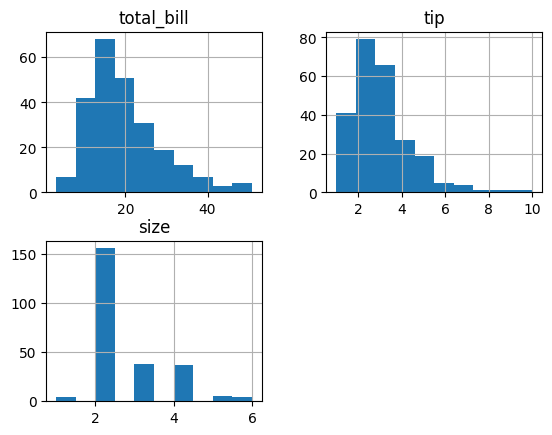

In [ ]:
# ヒストグラムの表示｜全項目
df.hist()
plt.show()

<Axes: >

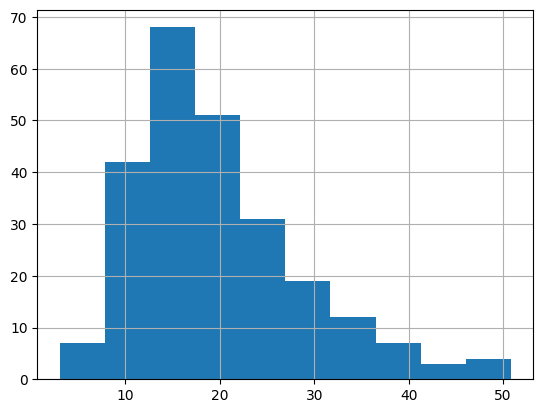

In [ ]:
# ヒストグラムの表示｜特定カラムのみ
df['total_bill'].hist()


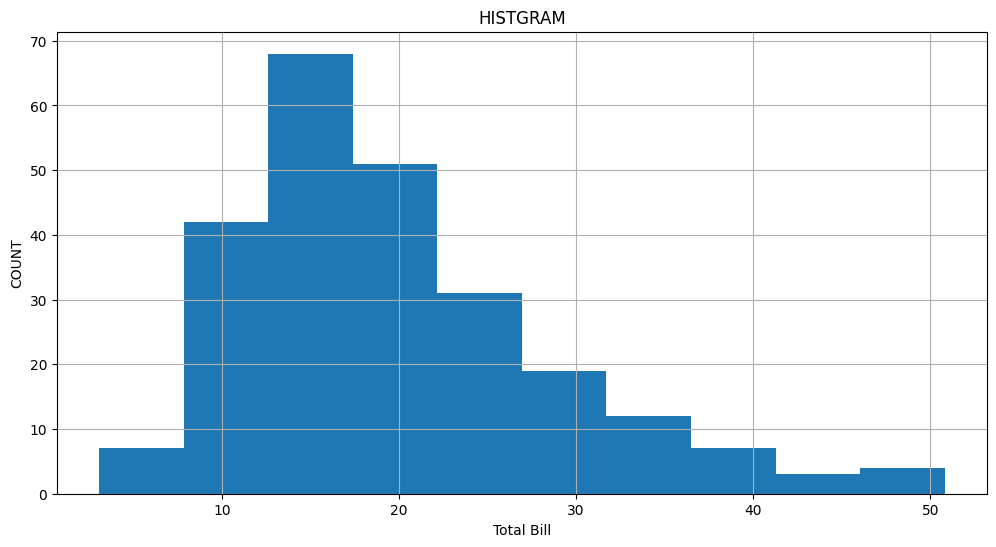

In [ ]:
# ヒストグラムの表示｜特定項目の表示｜オプション指定
df.hist( 'total_bill' , figsize = ( 12, 6 ) )

# タイトル・ラベルの表示
plt.title("HISTGRAM")
plt.xlabel("Total Bill")
plt.ylabel("COUNT")
plt.show()

### 箱ひげ図　boxplot

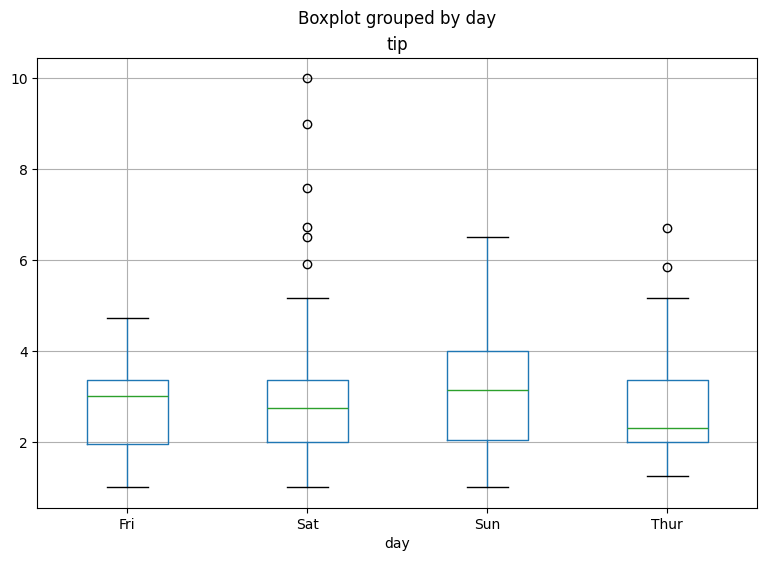

In [ ]:
# 箱ひげ図
df.boxplot( column = 'tip', by = 'day' , figsize = ( 9, 6 ) )
plt.show()

### 散布図 plot.scatter

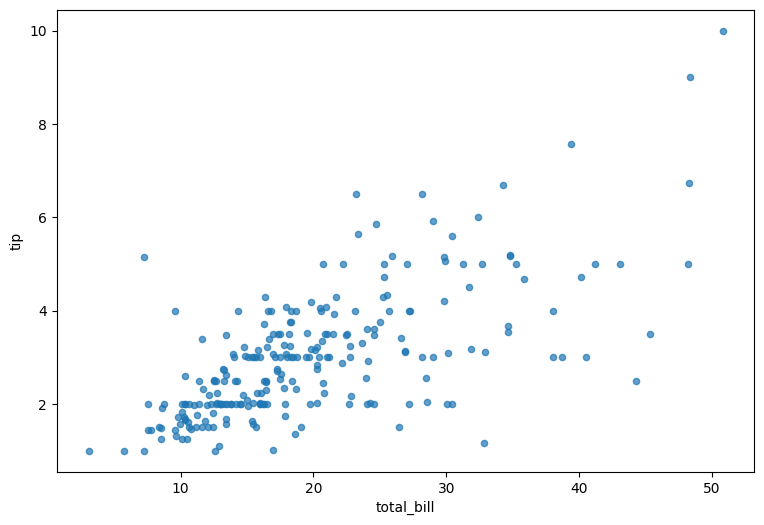

In [ ]:
# 散布図
df.plot.scatter( x = 'total_bill' , y = 'tip' , figsize = ( 9, 6 ) , alpha = 0.7 )
plt.show()

## 折れ線グラフ、棒グラフ、円グラフ


 ### 参考：失敗例
折れ線グラフ、棒グラフ、円グラフでは、全てのデータを可視化しても読み取れません


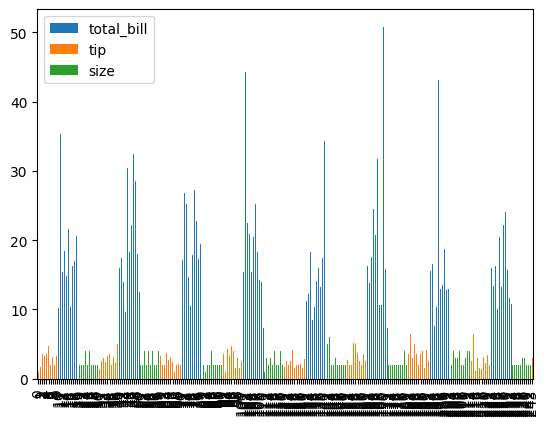

In [ ]:
df.plot.bar()
plt.show()

### グラフ用のデータフレーム の作成

In [ ]:
# グラフ化するデータとして「曜日別の平均」を算出して新たなデータフレームを作成
df2 = df.groupby( 'day' ).mean( numeric_only=True )
df2

,total_bill,tip,size
day,,,
Fri,17.151579,2.734737,2.105263
Sat,20.441379,2.993103,2.517241
Sun,21.410000,3.255132,2.842105
Thur,17.682742,2.771452,2.451613


In [ ]:
# 曜日の並びを整える
df2 = df2.reindex( index = [ 'Thur', 'Fri', 'Sat' , 'Sun' ] )
df2

,total_bill,tip,size
day,,,
Thur,17.682742,2.771452,2.451613
Fri,17.151579,2.734737,2.105263
Sat,20.441379,2.993103,2.517241
Sun,21.410000,3.255132,2.842105


### 折れ線グラフ plot

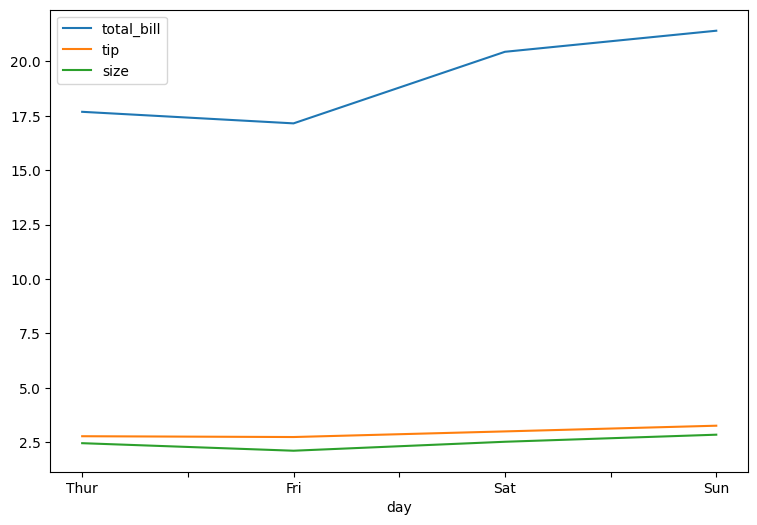

In [ ]:
# 折れ線グラフの表示
df2.plot( figsize = ( 9, 6 ) )
plt.show()


### 棒グラフ plot.bar

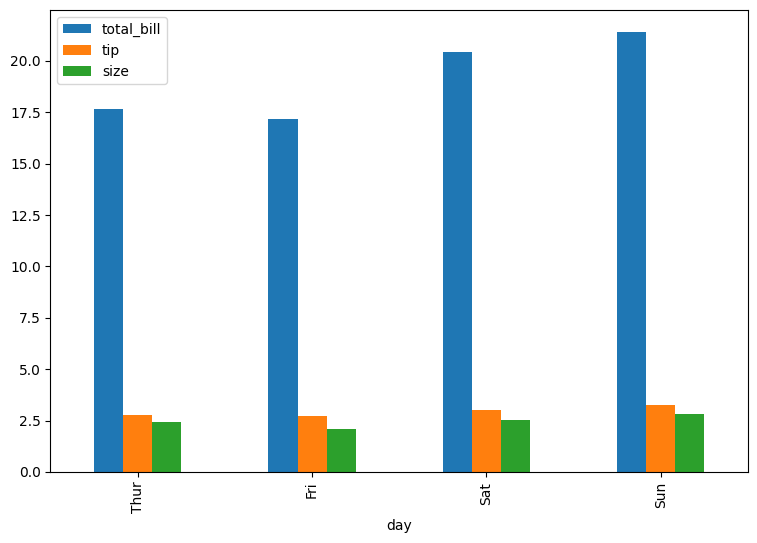

In [ ]:
# 棒グラフの表示
df2.plot.bar( figsize = ( 9 , 6 ) )
plt.show()

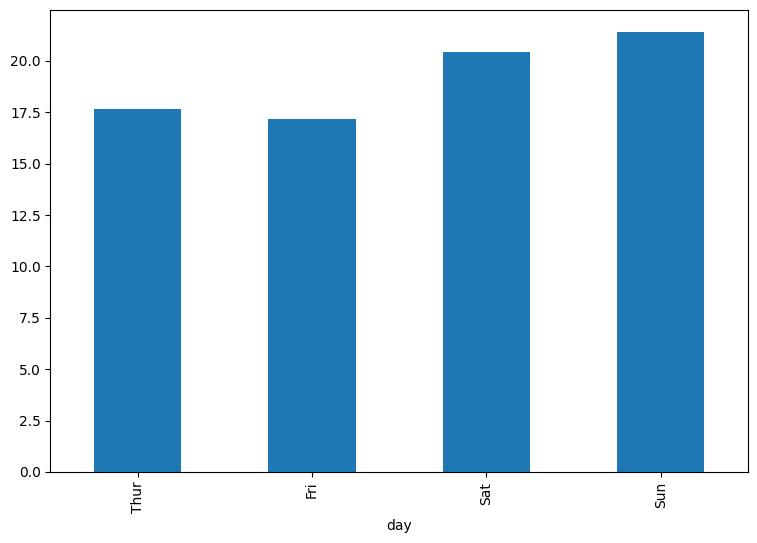

In [ ]:
# 棒グラフ｜項目を絞り込み
df2[ 'total_bill' ].plot.bar( figsize = ( 9 , 6 ) )
plt.show()


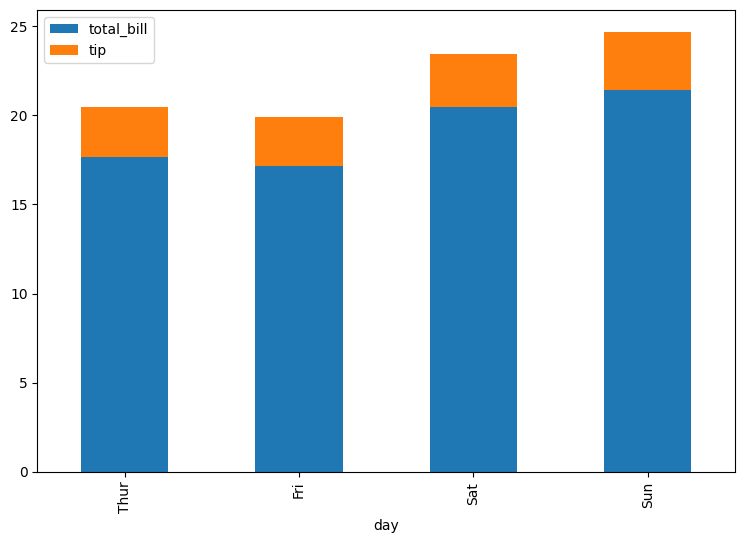

In [ ]:
# 棒グラフ｜積み重ね
df2[ ['total_bill' , 'tip'] ].plot.bar( stacked=True , figsize = ( 9 , 6 ) )
plt.show()

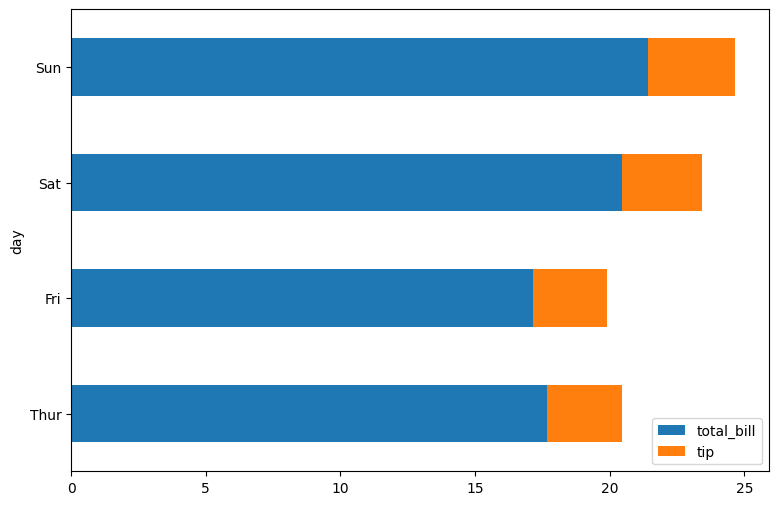

In [ ]:
# 横棒グラフ｜積み重ね > bar を barh にするだけ
df2[ ['total_bill' , 'tip'] ].plot.barh( stacked=True , figsize = ( 9 , 6 ) )
plt.show()

### 円グラフ plot.pie

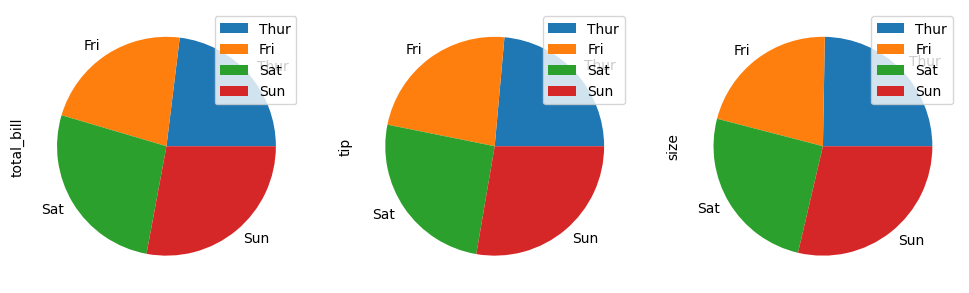

In [ ]:
# 円グラフの描画
df2.plot.pie( subplots = True , figsize = (12,6) )
plt.show()

### 円グラフ matplotlib の plt.pie の利用

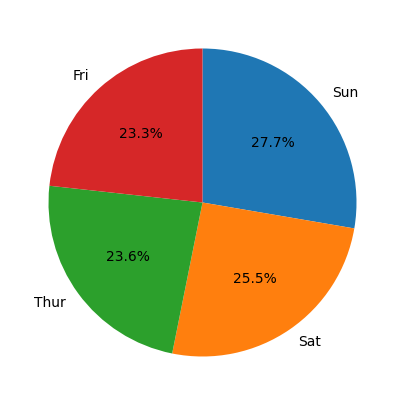

In [ ]:
# Tip の額の大きい順に並べ替え
df3 = df2.sort_values( 'tip' , ascending=False )

# matplotlib の plt.pie を用いた詳細な円グラフの描画
plt.figure( figsize=(5,5))
plt.pie( df3['tip'] , labels = df3.index , autopct='%1.1f%%' , startangle=90 , counterclock=False )
plt.show()

## 参考：複数のグラフの配置方法

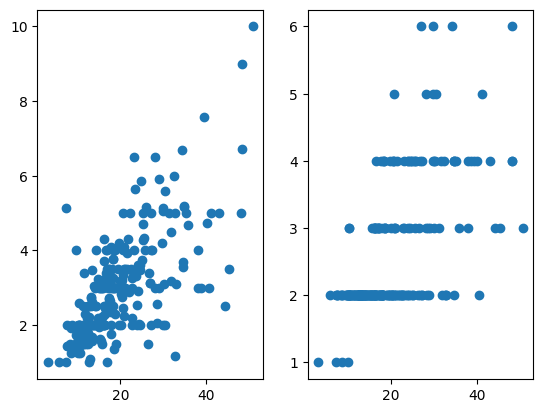

In [ ]:
# ３つの列をそれぞれ個別のデータフレームに
x = df[ 'total_bill' ]
y = df[ 'tip' ]
z = df[ 'size' ]

# サブプロットを１行２列の配列の１つ目に配置
plt.subplot( 1, 2, 1 )
ax1 = plt.scatter( x,y )

# サブプロットを１行２列の配列の２つ目に配置
plt.subplot( 1, 2, 2 )
ax2 = plt.scatter( x,z )

plt.show()

